In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("swiggy_all_menus_india.csv")

In [4]:
df.head()

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,0.0,0
1,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,0.0,0


In [5]:
df.shape

(197430, 9)

In [6]:
df.columns

Index(['State', 'City', 'Restaurant Name', 'Location', 'Category', 'Dish Name',
       'Price (INR)', 'Rating', 'Rating Count'],
      dtype='object')

In [7]:
df.rename(columns={'Price (INR)':'Price'},inplace=True)

# renaming columns to snake_case (column normalization)

In [8]:
df.columns=df.columns.str.strip().str.lower().str.replace(" ","_")

In [9]:
df.columns

Index(['state', 'city', 'restaurant_name', 'location', 'category', 'dish_name',
       'price', 'rating', 'rating_count'],
      dtype='object')

# 1. Clean the dataset

○ Handle missing values (fill or drop as required).

○ Remove or treat outliers.

○ Drop irrelevant or unwanted columns.

○ Ensure the dataset is consistent and ready for analysis

# Handle missing values (fill or drop as required).

In [10]:
df.isna().sum()

state              0
city               0
restaurant_name    0
location           0
category           0
dish_name          0
price              0
rating             0
rating_count       0
dtype: int64

# for this dataset there is no missing values here.so no need to handle missing values.

# handling duplicated values

In [11]:
df.duplicated().sum()

np.int64(6104)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

np.int64(0)

# Remove or treat outliers.

<Axes: >

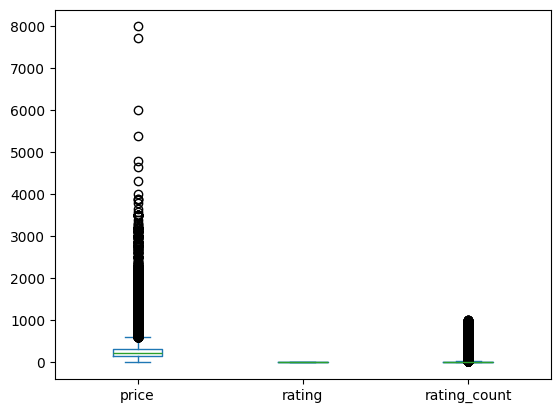

In [14]:
df.plot(kind="box")

In [15]:
Q1,Q2,Q3=np.percentile(df["price"],[25,50,75])
Q1,Q2,Q3

(np.float64(139.0), np.float64(229.0), np.float64(329.0))

In [16]:
IQR=Q3-Q1
lower_whisker=Q1-1.5*IQR
upper_whisker=Q3+1.5*IQR
outliers_of_price=df[(df["price"]<lower_whisker) | (df["price"]>upper_whisker)]
outliers_of_price

,state,city,restaurant_name,location,category,dish_name,price,rating,rating_count
563,Karnataka,Bengaluru,Pizza Hut,Kanakapura Road,Recommended,Bold BBQ Veggie Thin n Crispy,749.00,4.6,7
592,Karnataka,Bengaluru,Pizza Hut,Kanakapura Road,Thin n Crispy Pizzas,Bold BBQ Veggie Thin n Crispy,749.00,4.6,7
593,Karnataka,Bengaluru,Pizza Hut,Kanakapura Road,Thin n Crispy Pizzas,Tandoori Paneer Thin n Crispy,749.00,5.0,6
594,Karnataka,Bengaluru,Pizza Hut,Kanakapura Road,Thin n Crispy Pizzas,Mexican Fiesta Thin n Crispy,749.00,3.8,1
595,Karnataka,Bengaluru,Pizza Hut,Kanakapura Road,Thin n Crispy Pizzas,Dhabe Da Keema Thin n Crispy,749.00,0.0,0
...,...,...,...,...,...,...,...,...,...
197116,Sikkim,Gangtok,Domino's Pizza,DISTRICT COURT,Value Meals,Ultimate Cheese Burst Deluxe Combo (N Veg),815.00,0.0,0
197117,Sikkim,Gangtok,Domino's Pizza,DISTRICT COURT,Value Meals,Ultimate Cheese Burst Premium Combo (Veg),931.00,0.0,0
197118,Sikkim,Gangtok,Domino's Pizza,DISTRICT COURT,Value Meals,Meal for 4: Veg Cheesy Pizza,891.00,0.0,0
197120,Sikkim,Gangtok,Domino's Pizza,DISTRICT COURT,Value Meals,Meal for 2: Veg Paradise & Farmhouse,667.14,0.0,0


In [17]:
# percentage of outiler in price column
(len(outliers_of_price)/len(df))*100

4.9737097937551615

# the price column in this dataset it has 5% of outilers.now treat these outlier by using capping

In [18]:
def capping_price(x):
    if x<lower_whisker:
        x=lower_whisker
    elif x>upper_whisker:
        x=upper_whisker
    else:
        return x
    return x    

In [19]:
df["price"]=df["price"].apply(capping_price)

<Axes: >

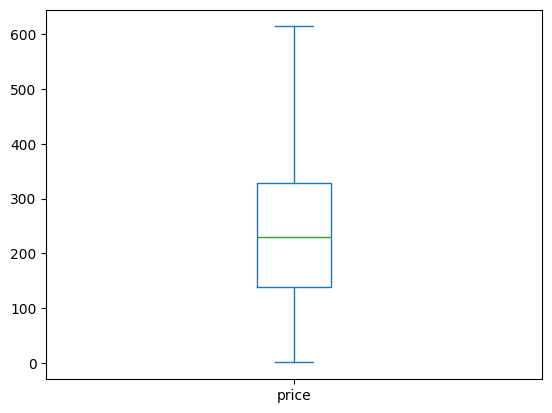

In [20]:
df["price"].plot(kind="box")

In [21]:
Q1,Q2,Q3=np.percentile(df['rating_count'],[25,50,75])
Q1,Q2,Q3

(np.float64(0.0), np.float64(2.0), np.float64(15.0))

In [22]:
IQR=Q3-Q1
lower_whisker=Q1-1.5*IQR
upper_whisker=Q3+1.5*IQR
outliers_of_rating=df[(df['rating_count']<lower_whisker) | (df['rating_count']>upper_whisker)]
outliers_of_rating

,state,city,restaurant_name,location,category,dish_name,price,rating,rating_count
2,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.00,4.7,48
3,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.00,4.6,65
9,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,North Indian Gravy,Dal Tadka,195.00,4.9,51
38,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,North Indian Gravy,Dal Fry,182.00,4.3,68
61,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Manchurian & Chilly,Mushroom Pepper Dry,228.00,2.6,45
...,...,...,...,...,...,...,...,...,...
196213,Sikkim,Gangtok,KFC,Baluwakhani,BURGERS,Chicken Zinger Burger - Classic,234.13,4.5,40
197314,Sikkim,Gangtok,Mama's Kitchen,Gangtok,Recommended,Veg roll,70.00,4.3,59
197320,Sikkim,Gangtok,Mama's Kitchen,Gangtok,Recommended,Veg chowmein ...,70.00,4.1,46
197360,Sikkim,Gangtok,Mama's Kitchen,Gangtok,Roll,Veg roll,70.00,4.3,59


In [23]:
(len(outliers_of_rating)/len(df))*100

14.748648902919623

# the rating count column in this dataset it has 14% of outilers.now treat these outlier by using capping 

In [24]:
def capping_rating(x):
    if x<lower_whisker:
        x=lower_whisker
    elif x>upper_whisker:
        x=upper_whisker
    else:
        return x
    return x    

In [25]:
df['rating_count']=df['rating_count'].apply(capping_rating)

<Axes: >

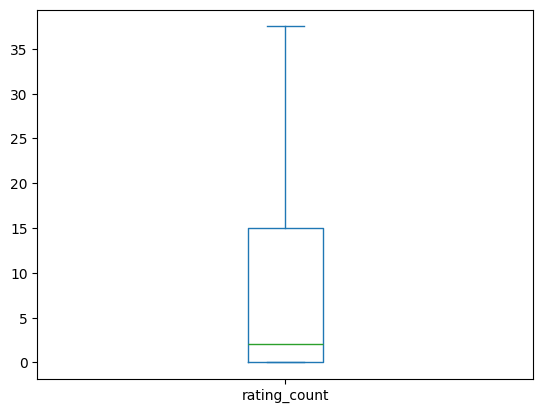

In [26]:
df['rating_count'].plot(kind="box")

# Drop irrelevant or unwanted columns.

In [27]:
df.head(1)

,state,city,restaurant_name,location,category,dish_name,price,rating,rating_count
0,Karnataka,Bengaluru,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,0.0,0.0


# for this dataset all columns are need for analysis to answer some  type of bussiness driven decision questions

# Ensure the dataset is consistent and ready for analysis
## check by using some key parameters

In [28]:
df.isna().sum()

state              0
city               0
restaurant_name    0
location           0
category           0
dish_name          0
price              0
rating             0
rating_count       0
dtype: int64

In [29]:
df.dtypes

state               object
city                object
restaurant_name     object
location            object
category            object
dish_name           object
price              float64
rating             float64
rating_count       float64
dtype: object

In [30]:
df.duplicated().sum()

np.int64(71)

In [31]:
# ensure values are falls within expected range
max_rating=df["rating"].max()
min_rating=df["rating"].min()
print(max_rating)
print(min_rating)

5.0
0.0


<Axes: >

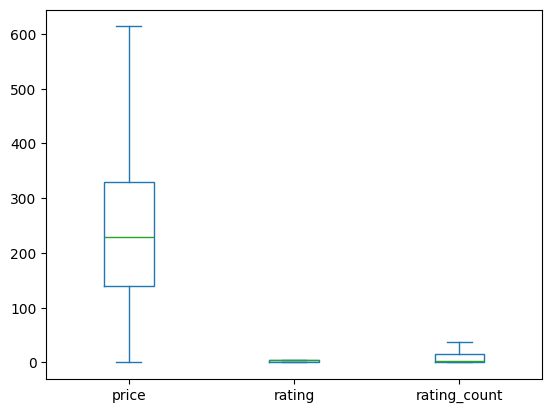

In [32]:
# outlier checking 
df.plot(kind="box")

In [33]:
# formating columns
df.columns

Index(['state', 'city', 'restaurant_name', 'location', 'category', 'dish_name',
       'price', 'rating', 'rating_count'],
      dtype='object')

In [34]:
# integrity check (min_price<= max_price)
min_price=df["price"].min()
max_price=df["price"].max()
print(min_price)
print(max_price)

0.95
614.0


# After performing data cleaning and preprocessing, the dataset has been ensured to be complete, consistent, and reliable. All missing values and duplicates have been handled, data types are correctly assigned, outliers in numeric columns have been addressed, categorical values standardized, and irrelevant columns removed. The dataset is now clean, structured, and ready for analysis or modeling.

# Explore the dataset:



# Go through each column carefully to understand its data type,meaning and summarize the dataset.

In [35]:
df.dtypes

state               object
city                object
restaurant_name     object
location            object
category            object
dish_name           object
price              float64
rating             float64
rating_count       float64
dtype: object

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191326 entries, 0 to 197429
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   state            191326 non-null  object 
 1   city             191326 non-null  object 
 2   restaurant_name  191326 non-null  object 
 3   location         191326 non-null  object 
 4   category         191326 non-null  object 
 5   dish_name        191326 non-null  object 
 6   price            191326 non-null  float64
 7   rating           191326 non-null  float64
 8   rating_count     191326 non-null  float64
dtypes: float64(3), object(6)
memory usage: 14.6+ MB


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,191326.0,252.072443,146.395450,0.95,139.0,229.0,329.0,614.0
rating,191326.0,2.607342,2.146412,0.00,0.0,3.9,4.5,5.0
rating_count,191326.0,9.842097,13.752102,0.00,0.0,2.0,15.0,37.5


In [38]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
state,191326,28,Karnataka,18349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,191326,28,Bengaluru,18349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurant_name,191326,993,McDonald's,12833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,191326,977,Gomti Nagar,2054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,191326,4972,Recommended,23243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dish_name,191326,59064,Choco Lava Cake,291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,191326.0,NaN,NaN,NaN,252.072443,146.39545,0.95,139.0,229.0,329.0,614.0
rating,191326.0,NaN,NaN,NaN,2.607342,2.146412,0.0,0.0,3.9,4.5,5.0
rating_count,191326.0,NaN,NaN,NaN,9.842097,13.752102,0.0,0.0,2.0,15.0,37.5


In [39]:
df["state"].value_counts()

state
Karnataka            18349
Maharashtra          10467
Telangana            10279
Delhi                10183
Tamil Nadu           10042
Rajasthan             9801
Uttar Pradesh         9581
West Bengal           9381
Punjab                9358
Gujarat               8867
Madhya Pradesh        7114
Meghalaya             5183
Jharkhand             5100
Uttarakhand           5084
Himachal Pradesh      5054
Assam                 5032
Goa                   5030
Kerala                5029
Chhattisgarh          5025
Odisha                5018
Haryana               5005
Manipur               5001
Bihar                 5000
Jammu and Kashmir     4974
Tripura               4947
Mizoram               3031
Nagaland              2286
Sikkim                2105
Name: count, dtype: int64

In [40]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'distribution of order in swiggy')

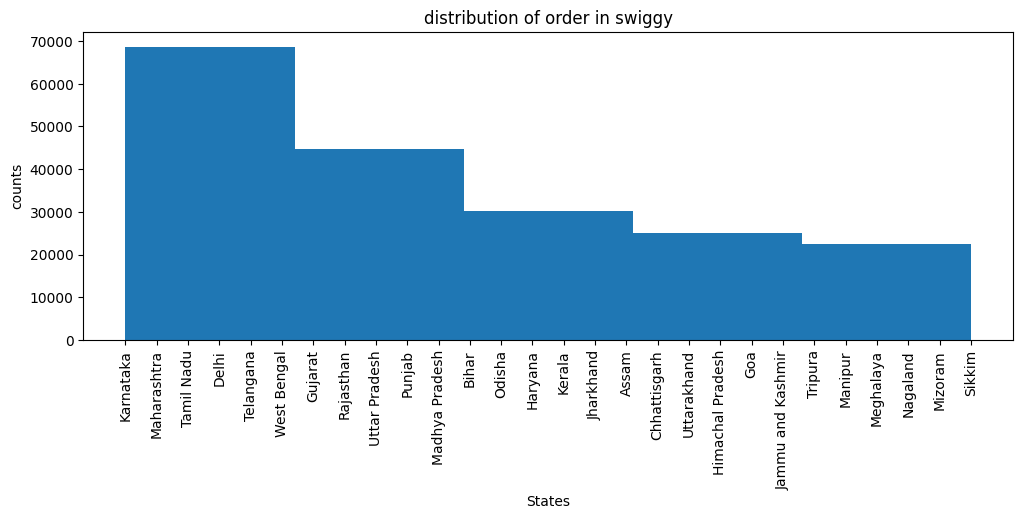

In [41]:
plt.figure(figsize=(12,4))
plt.hist(df["state"],bins=5)
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("counts")
plt.title("distribution of order in swiggy")
           

In [42]:
df["city"].value_counts()

city
Bengaluru      18349
Mumbai         10467
Hyderabad      10279
New Delhi      10183
Chennai        10042
Jaipur          9801
Lucknow         9581
Kolkata         9381
Chandigarh      9358
Ahmedabad       8867
Indore          7114
Shillong        5183
Ranchi          5100
Dehradun        5084
Shimla          5054
Guwahati        5032
Panaji          5030
Kochi           5029
Raipur          5025
Bhubaneswar     5018
Gurgaon         5005
Imphal          5001
Patna           5000
Srinagar        4974
Agartala        4947
Aizawl          3031
Kohima          2286
Gangtok         2105
Name: count, dtype: int64

In [43]:
df["location"].value_counts()

location
Gomti Nagar            2054
Nerul                  2034
Yelahanka              1990
Police Bazar           1814
Vasant Kunj            1789
                       ... 
Mal Godown Market         4
SECTOR-109                3
Bohri Kadal               3
ASHIYANA DIGHA ROAD       3
Faridabad                 2
Name: count, Length: 977, dtype: int64

In [44]:
df["category"].value_counts()

category
Recommended                    23243
Main Course                     2953
Desserts                        2844
Beverages                       2405
McSaver Combos (2 Pc Meals)     1729
                               ...  
EID special sweet box              1
Combo Offer                        1
Food Pack Dinner                   1
Chinese- Dragon's Belly            1
make your own combo                1
Name: count, Length: 4972, dtype: int64

In [45]:
# how many categories place minimum order 
df1=pd.DataFrame(df["category"].value_counts())

In [46]:
df1.reset_index(inplace=True)

In [47]:
series1=df1[df1["count"]==1]["category"]

In [48]:
l1=list(series1)

In [49]:
len(l1)

336

In [50]:
df["dish_name"].unique()

array(['Butter Murukku-200gm', 'Badam Milk', 'Chow Chow Bath', ...,
       'Chilli cheese momo ', 'Veg Momos (8 Pc)', 'Soya Momo'],
      shape=(59064,), dtype=object)

In [51]:
df["dish_name"].value_counts()

dish_name
Choco Lava Cake                                       291
Veg Fried Rice                                        240
Paneer Butter Masala                                  225
Chicken Sausage                                       224
Jeera Rice                                            214
                                                     ... 
Sweet corn soup                                         1
Mushroom soup                                           1
Garlic soup                                             1
Crispy baby corn chilli                                 1
Puri aloo dum                                           1
Name: count, Length: 59064, dtype: int64

In [52]:
df

,state,city,restaurant_name,location,category,dish_name,price,rating,rating_count
0,Karnataka,Bengaluru,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,0.0,0.0
1,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25.0
2,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,37.5
3,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,37.5
4,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
197425,Sikkim,Gangtok,Mama's Kitchen,Gangtok,Momos,Soya cheese chilli momo ...,112.0,0.0,0.0
197426,Sikkim,Gangtok,Mama's Kitchen,Gangtok,Momos,Kurkure momo fried ...,140.0,0.0,0.0
197427,Sikkim,Gangtok,Mama's Kitchen,Gangtok,Momos,Chilli cheese momo,126.0,0.0,0.0
197428,Sikkim,Gangtok,Mama's Kitchen,Gangtok,Momos,Veg Momos (8 Pc),85.0,0.0,0.0


In [53]:
df

,state,city,restaurant_name,location,category,dish_name,price,rating,rating_count
0,Karnataka,Bengaluru,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,0.0,0.0
1,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25.0
2,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,37.5
3,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,37.5
4,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
197425,Sikkim,Gangtok,Mama's Kitchen,Gangtok,Momos,Soya cheese chilli momo ...,112.0,0.0,0.0
197426,Sikkim,Gangtok,Mama's Kitchen,Gangtok,Momos,Kurkure momo fried ...,140.0,0.0,0.0
197427,Sikkim,Gangtok,Mama's Kitchen,Gangtok,Momos,Chilli cheese momo,126.0,0.0,0.0
197428,Sikkim,Gangtok,Mama's Kitchen,Gangtok,Momos,Veg Momos (8 Pc),85.0,0.0,0.0


In [54]:
# finding the relation between the numerical columns
numerical_col=df.select_dtypes(include="number").columns
numerical_col


Index(['price', 'rating', 'rating_count'], dtype='object')

In [55]:
df[numerical_col].corr()

,price,rating,rating_count
price,1.000000,-0.107418,-0.155330
rating,-0.107418,1.000000,0.576857
rating_count,-0.155330,0.576857,1.000000


In [56]:
df["state"].value_counts()

state
Karnataka            18349
Maharashtra          10467
Telangana            10279
Delhi                10183
Tamil Nadu           10042
Rajasthan             9801
Uttar Pradesh         9581
West Bengal           9381
Punjab                9358
Gujarat               8867
Madhya Pradesh        7114
Meghalaya             5183
Jharkhand             5100
Uttarakhand           5084
Himachal Pradesh      5054
Assam                 5032
Goa                   5030
Kerala                5029
Chhattisgarh          5025
Odisha                5018
Haryana               5005
Manipur               5001
Bihar                 5000
Jammu and Kashmir     4974
Tripura               4947
Mizoram               3031
Nagaland              2286
Sikkim                2105
Name: count, dtype: int64

In [57]:
df.price.min()

0.95

In [58]:
df.price.max()

614.0

In [59]:
df[df["price"]==0.95]

,state,city,restaurant_name,location,category,dish_name,price,rating,rating_count
636,Karnataka,Bengaluru,Pizza Hut,Kanakapura Road,Appetizer,Tomato Ketchup,0.95,4.3,37.5
2410,Karnataka,Bengaluru,Pizza Hut,Global Mall,Appetizer,Tomato Ketchup,0.95,4.5,37.5
3900,Karnataka,Bengaluru,Pizza Hut,Banashankari,Appetizer,Tomato Ketchup,0.95,4.3,37.5
4409,Karnataka,Bengaluru,Pizza Hut,Varthur Gunjur,Appetizer,Tomato Ketchup,0.95,4.3,37.5
6267,Karnataka,Bengaluru,Pizza Hut,Jalahalli Cross,Appetizer,Tomato Ketchup,0.95,4.2,37.5
...,...,...,...,...,...,...,...,...,...
188262,Meghalaya,Shillong,Pizza Hut,Police Bazaar,Appetizer,Tomato Ketchup,0.95,4.2,37.5
192441,Mizoram,Aizawl,Pizza Hut,Aizwal,Appetizer,Tomato Ketchup,0.95,4.5,30.0
194306,Mizoram,Aizawl,Pizza Hut,Bawngkawn,Appetizer,Tomato Ketchup,0.95,3.8,26.0
194871,Mizoram,Aizawl,Pizza Hut,Aizawl,Appetizer,Tomato Ketchup,0.95,4.2,22.0


In [60]:
df[df["price"]==614.0]

,state,city,restaurant_name,location,category,dish_name,price,rating,rating_count
563,Karnataka,Bengaluru,Pizza Hut,Kanakapura Road,Recommended,Bold BBQ Veggie Thin n Crispy,614.0,4.6,7.0
592,Karnataka,Bengaluru,Pizza Hut,Kanakapura Road,Thin n Crispy Pizzas,Bold BBQ Veggie Thin n Crispy,614.0,4.6,7.0
593,Karnataka,Bengaluru,Pizza Hut,Kanakapura Road,Thin n Crispy Pizzas,Tandoori Paneer Thin n Crispy,614.0,5.0,6.0
594,Karnataka,Bengaluru,Pizza Hut,Kanakapura Road,Thin n Crispy Pizzas,Mexican Fiesta Thin n Crispy,614.0,3.8,1.0
595,Karnataka,Bengaluru,Pizza Hut,Kanakapura Road,Thin n Crispy Pizzas,Dhabe Da Keema Thin n Crispy,614.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
197116,Sikkim,Gangtok,Domino's Pizza,DISTRICT COURT,Value Meals,Ultimate Cheese Burst Deluxe Combo (N Veg),614.0,0.0,0.0
197117,Sikkim,Gangtok,Domino's Pizza,DISTRICT COURT,Value Meals,Ultimate Cheese Burst Premium Combo (Veg),614.0,0.0,0.0
197118,Sikkim,Gangtok,Domino's Pizza,DISTRICT COURT,Value Meals,Meal for 4: Veg Cheesy Pizza,614.0,0.0,0.0
197120,Sikkim,Gangtok,Domino's Pizza,DISTRICT COURT,Value Meals,Meal for 2: Veg Paradise & Farmhouse,614.0,0.0,0.0


In [61]:
df.rating.value_counts()

rating
0.0    75490
4.3    11299
4.6    10517
4.4    10431
4.5     9627
5.0     9060
4.7     8781
4.8     8502
4.2     7922
4.1     6909
4.9     5528
4.0     4846
3.9     3883
3.8     3850
3.7     2627
3.6     1960
3.5     1825
3.4     1301
3.3     1243
3.2      972
3.0      726
3.1      675
2.8      538
2.9      530
2.7      422
2.6      300
2.5      281
2.0      244
2.4      229
2.3      223
2.2      207
2.1      159
1.5       64
1.8       53
1.9       48
1.6       30
1.7       24
Name: count, dtype: int64

# Document your understanding of what each column represents

# Document
## states column:
- the state column represent in which the state order is placed in india.
- I obsereved ,karnataka state got more order among all the states in india .the lowest orders place in sikkim state.
- the telangana,delhi,tamilnaidu  relatively similar order placed.and these states got more than 70% orders of karantaka.
- level of states got order
   - low orders: Mizoram,Nagaland,Sikkim
   - medium orders: Meghalaya,Jharkhand,Uttarakhand,Himachal Pradesh,Assam,Goa,Kerala,Chhattisgarh,Odisha,Haryana,Manipur                     Bihar,Jammu and Kashmir .
   - high orders:  Maharashtra ,Telangana,Delhi,Tamil Nadu,Rajasthan,Uttar Pradesh ,West Bengal,Punjab

## Cities column:
- the cities column also represents in which city order  on the state.
- the states parllel cities got orders.in this data cities are capital cities of the state.

## location column:
- the location repressented in which located location resturant get order.
- In Gomti Nagar location placed more orders.
- In faridabad location placed minimu orders around all location
- more order placed locations are located in karantaka.

## category column:
- category column represents in which category of dish ordered.
- Recommened category got more orders when compared to other categories
- the minimum order getting categories are 336 categories with 1 order

## dish_name column:
- dish column represents  which dish the person ordered.
- the dish column nearly 59064 are order in this data set.
- choco lava cake got more orders
- top 5 order dishes are choco lava cake,veg fired rice,panner butter masala,chicken sausage,jeera juice.

## price column:
- the price column represent the price of  dish
- the price of the items in the range of 0.95 to 614 rupees after ouliers capping
- the lowest price items is Tomato Ketchup.
- the highest price item is Bold BBQ Veggie Thin n Crispy and more.

## Rating column:
- the rating columns represents the rating given by the person to the dish
- the rating in the range of 0 to 5
- most dishes got 4.3 rating other than 0.0 rating
      

# 3. Generate Questions & Answers:

# Based on your exploration, create at least 10 meaningful questions and Answer those questions using Pandas functions.

# questions
- which state getting more orders?
- which state getting low orders?
- what percentage of orders covered by karantaka?
- top 3 states who got order more?
- top 10 location give more orders?
- which category got more orders?
- which category got  low orders?
- what are the top 5  categories gives more orders?
- give name of the dish get more orders?
- what are top 5 dishes ordered more?
- whic category of dishes ordered most?
- please give top 3 more rateded items names.?
- please give more number of rating  get dish and location?

In [113]:
# which state getting more orders?
df.state.value_counts().idxmax()

'Karnataka'

# karantaka got more orders

In [63]:
# which state getting low orders?
df.state.value_counts().idxmin()

'Sikkim'

# sikkim got less orders

In [64]:
# what percentage of orders covered by karantaka?
total_orders=len(df)
karantaka_count=len(df[df['state']=='Karnataka'])
percent_karantaka=(karantaka_count/total_orders)*100
percent_karantaka

9.590437264146011

# Around 9.5 percentage order from karantaka on overall

In [65]:
# top 3 states  got order more?
df.state.value_counts().sort_values(ascending=False).head(3)

state
Karnataka      18349
Maharashtra    10467
Telangana      10279
Name: count, dtype: int64

# the order get ranking is 1.Karnataka  18349 2.Maharashtra  10467 3.Telangana  10279

In [66]:
# top 10 location give more orders?
df.location.value_counts().sort_values(ascending=False).head(10)

location
Gomti Nagar      2054
Nerul            2034
Yelahanka        1990
Police Bazar     1814
Vasant Kunj      1789
Whitefield       1727
Thane West       1711
Jagatpura        1662
Gangtok          1544
Shankar Nagar    1460
Name: count, dtype: int64

# These are top 10 order getting locations Gomti Nagar,Nerul,Yelahanka,Police Bazar,Vasant Kunj,Whitefield ,Thane West,Jagatpura,Gangtok ,Shankar Nagar    1460.

In [67]:
# which category got more orders?
df.category.value_counts().sort_values(ascending=False).idxmax()

'Recommended'

# The recommended category got more orders

In [68]:
# which category got  low orders?
df.category.value_counts().sort_values(ascending=False).idxmin()

'Pistachio Chocolate Bar 125Gm'

# Pistachio Chocolate Bar 125Gm  category get minimum order with only one order 

In [72]:
# top 5 category give more orders?
df.category.value_counts().sort_values(ascending=False).iloc[:5]

category
Recommended                    23243
Main Course                     2953
Desserts                        2844
Beverages                       2405
McSaver Combos (2 Pc Meals)     1729
Name: count, dtype: int64

In [73]:
df.head(2)

,state,city,restaurant_name,location,category,dish_name,price,rating,rating_count
0,Karnataka,Bengaluru,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,0.0,0.0
1,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25.0


In [86]:
#  give name of the dish get more orders?
df.dish_name.value_counts().sort_values(ascending=False).idxmax()


'Choco Lava Cake'

# Choco Lava Cake more ordered item

In [88]:
# - what are top 5 dishes ordered more?
df.dish_name.value_counts().sort_values(ascending=False).iloc[:5]

dish_name
Choco Lava Cake         291
Veg Fried Rice          240
Paneer Butter Masala    225
Chicken Sausage         224
Jeera Rice              214
Name: count, dtype: int64

# These are the top 5 dishes 1.Choco Lava Cake  2.Veg Fried Rice  3.Paneer Butter Masala   4.Chicken Sausage   5.Jeera Rice     

In [91]:
# what are the average orders of  dishes?
df.groupby("dish_name")["price"].mean().sort_values(ascending=False)

dish_name
Chicken Extravaganza Pizza and Garlic Knots Combo    614.000000
Chicken Full Smash Pizza [BIG 10"]                   614.000000
Chicken Dum Biryani Combo                            614.000000
 House Party wali   Meal-Non-veg                     614.000000
 Kosha Mangsho                                       614.000000
                                                        ...    
Ketchup Sacthe                                         1.500000
Tomato Ketchup                                         1.155114
Tomato Ketchup Sachet                                  1.000000
DIY Fresh Foodie Bag                                   1.000000
Ketchup                                                0.952174
Name: price, Length: 59064, dtype: float64

In [93]:
# which category of dishes ordered most?
df.groupby(by="category")["dish_name"].count().idxmax()

'Recommended'

In [97]:
# what are those dishes
df[df.category=="Recommended"]["dish_name"]

1                                                Badam Milk
2                                            Chow Chow Bath
3                                               Kesari Bath
4                                                Mix Raitha
5                                    Srinidhi Sagar Special
                                ...                        
197320    Veg chowmein                                  ...
197321                                        Soya chowmein
197322                                      Paneer chowmein
197323    Veg thukpa                                    ...
197324                                         Mix chowmien
Name: dish_name, Length: 23243, dtype: object

In [98]:
# count of those dishes
len(df[df.category=="Recommended"]["dish_name"])

23243

In [108]:
# please give more number of rating  get dish and location?
df[["dish_name","rating"]].sort_values(by="rating",ascending=False).head(3)

,dish_name,rating
165729,Schweppes Water bottle,5.0
165719,Ice Americano Coffee,5.0
165709,Korean Spice Mix,5.0


In [109]:
df.head(3)

,state,city,restaurant_name,location,category,dish_name,price,rating,rating_count
0,Karnataka,Bengaluru,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,0.0,0.0
1,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25.0
2,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,37.5


In [112]:
# please give more number of rating  get dish and location?
df[["dish_name","location","rating_count"]].sort_values(by="rating_count").max()

dish_name       |OB Chicken Tikka
location                yelahanka
rating_count                 37.5
dtype: object

# the  more rating_count  dish_name is OB Chicken Tikka,location is yelahanka ,rating_count with 37.5

# 4. Perform Analysis:


In [115]:
# checking correlation between numerical columns in the dataset
numerical_cols=df.select_dtypes(include=np.number).columns
numerical_cols

Index(['price', 'rating', 'rating_count'], dtype='object')

In [117]:
df[numerical_cols].corr()

,price,rating,rating_count
price,1.000000,-0.107418,-0.155330
rating,-0.107418,1.000000,0.576857
rating_count,-0.155330,0.576857,1.000000


# there is no correlation between price to rating and price to rating_count .but there is a weak postive correlation on rating and rating_count.

# 5. Summary & Insights: Write a short summary of your analysis.


### Key Insights from Swiggy Dataset Analysis

1. **State-level Orders**

   * Karnataka has the highest number of orders.
   * Sikkim has the lowest.
   * A few states (Karnataka, Maharashtra, Telangana, Delhi, Tamil Nadu) dominate orders, showing concentration in metro regions.

2. **City-level Trends**

   * Bengaluru tops in city-level orders.
   * Orders are mostly concentrated in capital cities.

3. **Location Insights**

   * Gomti Nagar (Lucknow) has the most orders among all locations.
   * Some locations like Faridabad have very few orders.

4. **Category Analysis**

   * “Recommended” category dominates orders.
   * Many niche categories have very few orders (over 300 categories with just 1 order).

5. **Dish Preferences**

   * Most ordered dish: **Choco Lava Cake**.
   * Other top dishes: Veg Fried Rice, Paneer Butter Masala, Chicken Sausage, Jeera Rice.

6. **Price Distribution**

   * Dish prices range from ₹0.95 (e.g., Tomato Ketchup) to ₹614 (premium pizzas/meals).
   * Average dish price ~₹252.

7. **Ratings**

   * Ratings range 0 to 5.
   * Large number of dishes have 0 rating (not rated).
   * Common positive ratings: 4.3, 4.5, 4.6.

8. **Correlation Insights**

   * **Price ↔ Rating**: Weak negative correlation (higher price doesn’t guarantee higher ratings).
   * **Price ↔ Rating Count**: Weak negative correlation.
   * **Rating ↔ Rating Count**: Moderate positive correlation (popular dishes with more ratings tend to have higher ratings).

9. **Top-Rated Items**

   * Examples: Schweppes Water Bottle, Ice Americano Coffee, Korean Spice Mix (all rated 5.0).

10. **Most Reviewed Dish**

* “OB Chicken Tikka” at Yelahanka had the highest rating count.

---

**Business Value**

* Focus promotions on top-performing states and cities (Karnataka, Bengaluru).
* Promote bestsellers like Choco Lava Cake across new markets.
* Optimize pricing, as premium pricing doesn’t directly improve ratings.
* Increase visibility of under-ordered categories/dishes to balance demand.
